# **Proyecto Titanic**



### Durante este proyecto haré el análisis exploratorio de datos aplicando técnicas de análisis y visualización de datos:

1. **Exploraré el conjunto de datos** para comprender la estructura, los tipos de variables presentes y cómo están distribuidas.
   **Limpiaré y prepararé el conjunto de datos** manipulando los datos para que sean más accesibles y útiles para el análisis. Esto incluye el trato de los valores faltantes, la conversión de tipos de datos y generación de nuevas variables a partir de las existentes.
   
2. **Analizaré el conjunto de datos**: Extraeré información útil y significativa del conjunto de datos a través de diversas técnicas de análisis de datos. </br>
   **Visualización de los datos**: Crearé gráficos y diagramas que ayuden a entender y comunicar los patrones y las relaciones presentes en los datos.

#### Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.express as px
import streamlit as st
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### Lectura del dataset

In [2]:
df = pd.read_csv(r"C:\Users\Dai\Desktop\Bootcamp_Upgrade_Hub\GitHub\Proyecto-Titanic\titanic.csv")

# Para que me muestre todas las columnas del dataframe, utilizo:
pd.set_option('display.max_columns', None) 

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Datos del dataset
- PassengerId: identificador único asignado a cada pasajero.
- Survived: indica si el pasajero sobrevivió al hundimiento del Titanic o no: 1 para sobreviviente y 0 para no sobreviviente.
- Pclass: representa la clase en la que viajaba el pasajero. Puede tener los valores 1, 2 o 3, que corresponden a primera, segunda y tercera clase respectivamente.
- Name: nombre completo de cada pasajero.
- Sex: indica el sexo del pasajero, "male" (hombre) o "female" (mujer).
- Age: edad del pasajero en el momento del hundimiento del Titanic.
- SibSp: número de hermanos o cónyuges que viajaban con el pasajero a bordo.
- Parch: número de padres o hijos que viajaban con el pasajero a bordo.
- Ticket: número de ticket del pasajero.
- Fare: precio pagado por el pasajero por el viaje.
- Cabin: número de cabina del pasajero.
- Embarked: puerto de embarque del pasajero: "C" para Cherbourg, "Q" para Queenstown y "S" para Southampton.

### **Análisis exploratorio de datos**

#### Uso el comando .info() para ver la información del dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Analizo las variables numéricas y categóricas

In [4]:
# Buscos los nombres de las columnas numericas y categoricas
def tipo_de_columnas_ordenadas (df):
    cat = []
    num = []
        
    for col in df.columns:
        if(df[col].dtype == "object"):
            cat.append(col)
        else:
            num.append(col)

    return cat , num

cat , num = tipo_de_columnas_ordenadas(df)
print("Las columnas categoricas son: ", cat)
print("Las columnas numericas son: ", num)

Las columnas categoricas son:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Las columnas numericas son:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Gráfica para representar las variables numéricas:

In [6]:
cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
fig = make_subplots(rows=1, cols=7, subplot_titles=cols)

colores = ['lightblue', 'lightgreen', 'red', 'orange', 'purple', 'green', 'pink']

for i, col in enumerate(cols):
    fig.add_trace(go.Histogram(x=df[col], nbinsx=20, name=f'Distribución de {col}', marker_color=colores[i]), row=1, col=i+1)

fig.update_layout(
    height=500,
    width=1200,
    title_text="Distribución de Variables Numéricas",
    showlegend=True)

fig.show()


#### Con estos histogramas podemos darnos una idea sobre la información que tenemos:
- La cantidad de sobrevivientes versus los que murieron.
- La cantidad de personas en 1era, 2da y 3era clase.
- La distribución de las edades de los pasajeros.
- Número de hermanos o cónyuges que viajaban con el pasajero a bordo.
- Número de padres o hijos que viajaban con el pasajero a bordo.
- La distribución de los precios de los tickets.

#### Gráfica para representar las variables categóricas:

In [7]:
cols =  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
colores = ['lightblue', 'lightgreen', 'red', 'orange', 'purple', 'green', 'pink']

fig = make_subplots(rows=1, cols=5, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
    go.Histogram(x=df[col],
    nbinsx=20,
    name=f'Distribución de {col}',
    marker_color=colores[i]),
    row=1, col=i+1)


fig.update_layout(
    title_text="Distribución de Variables Categóricas",
    showlegend=False)

fig.show()


#### Busco la cantidad de valores nulos de las columnas y cuáles son esos valores.

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Como figuran 177 valores nulos para la columna "Age", veo cuales son:
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


#### Para reemplazar los valores nulos de las edades voy a usar un enfoque de agrupación: voy a agrupar los datos por las columnas "Embarked" y "Pclass" y luego calcular la mediana de la columna "Age" dentro de cada grupo. Luego, voy a usar estas medianas calculadas para reemplazar los valores nulos en la columna "Age". 


In [10]:
median_grupo = df.groupby(['Embarked', 'Pclass'])['Age'].transform(lambda x: x.median())
df['Age'] = df['Age'].fillna(median_grupo)


#### Compruebo de que ya no tengo valores nulos en la columna "Age".

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Reemplazo los valores nulos de "Embarked" con la moda ya que se trata de una variable categórica

In [12]:
moda_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(moda_embarked)

Voy a eliminar la columna "Cabin" ya que es irrelevante para mi análisis

In [13]:
df.drop(['Cabin'], axis=1, inplace=True)

In [14]:
df.info() # Chequeo que ya no tengo valores nulos para "Age" y "Embarked" y que se haya eliminado "Cabin".

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### Ya exploré el conjunto de datos y comprendí la estructura, los tipos de variables presentes y cómo están distribuidas. También ya limpié y prepararé el conjunto de datos manipulándolos para que sean más accesibles y útiles para el posterior análisis. Ahora voy a proseguir con el análisis explicativo de los datos:

### **Análisis explicativo de datos**

#### **Análisis de los pasajeros**

#### Examino la distribución de las edades de los pasajeros. Identifico cuál es la edad mínima, la máxima y la media.

In [15]:
fig = px.box(
            df,
            y='Age')

fig.update_layout(
title="Distribución de edades",
xaxis_title="",
showlegend=False,
xaxis_showgrid=False,
yaxis_showgrid=False,
title_x=0.3)

fig.show()

In [16]:
min = df["Age"].min()
max = df["Age"].max()
median = df["Age"].median()

print('La edad mínima es:',min,'que equivale a 5 meses')
print('La edad máxima es:',max,'años')
print('La edad promedio es:',median,'años')

La edad mínima es: 0.42 que equivale a 5 meses
La edad máxima es: 80.0 años
La edad promedio es: 26.0 años


Voy a convertir la edad en una variable numérica discreta tomando valores enteros:

In [17]:
df["Age"] = df["Age"].astype(int)

In [18]:
fig = go.Figure()

trazo = go.Histogram(
    x=df['Age'],
    marker_color='lightgreen')

fig.add_trace(trazo)

fig.update_layout(
    title='Distribución de Edades de los Pasajeros del Titanic', 
    xaxis_title='Edad', 
    yaxis_title='Pasajeros', xaxis_showgrid=False, yaxis_showgrid=False)

fig.show()

#### Cual es la edad promedio de sobrevivientes?

In [19]:
# Calcular la edad promedio de los pasajeros que sobrevivieron y los que no sobrevivieron
edad_promedio_sobrevivientes = df[df['Survived'] == 1]['Age'].median()
edad_promedio_no_sobrevivientes = df[df['Survived'] == 0]['Age'].median()

print('Edad promedio de los sobrevivientes:', edad_promedio_sobrevivientes.astype(int))
print('Edad promedio de los No sobrevivientes:', edad_promedio_no_sobrevivientes.astype(int))

Edad promedio de los sobrevivientes: 27
Edad promedio de los No sobrevivientes: 25


In [20]:
edad_promedio_sobrevivientes = df[df['Survived'] == 1]['Age'].median()
edad_promedio_no_sobrevivientes = df[df['Survived'] == 0]['Age'].median()

fig = px.bar(
x=['Sobrevivientes', 'No Sobrevivientes'], 
y=[edad_promedio_sobrevivientes,edad_promedio_no_sobrevivientes],
color=['Sobrevivientes', 'No Sobrevivientes'])

fig.update_layout(title="Edad promedio de sobrevivientes y no sobrevivientes",
                yaxis_title="Edad promedio",
                xaxis_title='',
                showlegend=False,
                xaxis_showgrid=False,
                yaxis_showgrid=False,
                title_x=0.25)
            
fig.update_traces(marker_color=['green']) 

fig.show()

#### Hubo algún grupo de edades con mayor probabilidades de sobrevivir?

In [21]:
bins = [10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-10', '10-20', '20-30', '30-40', '50-60', '60-70', '70-80']
df['Grupo de Edad'] = pd.cut(df['Age'], bins=bins, labels=labels)
survival_by_age_group = df.groupby('Grupo de Edad')['Survived'].mean().reset_index()

fig = px.bar(
    survival_by_age_group,
    x='Grupo de Edad',
    y='Survived',
    color='Survived',
    color_continuous_scale='burg')

fig.update_layout(
    title='Tasa de Supervivencia por Edad de Pasajero',
    xaxis_title='Grupo de Edad',
    yaxis_title='Tasa de Supervivencia')

fig.show()


C:\Users\Dai\AppData\Local\Temp\ipykernel_18916\3539549386.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



El grupo de edades entre 20 y 30 años tuvo una tasa de supervivencia mas alta que los demás.

In [22]:
# Porcentaje de niños (0-10) entre los pasajeros:

niños = df[(df['Age'] >= 0) & (df['Age'] <= 10)]

total_embarcados = len(df)
niños_embarcados = len(niños)

porcentaje_niños_embarcados = (niños_embarcados / total_embarcados) * 100

print(f"El {porcentaje_niños_embarcados:.2f}% de los pasajeros eran niños entre 0 y 10 años.")


El 7.18% de los pasajeros eran niños entre 0 y 10 años.


In [23]:
# % de niños que sobrevivieron

niños_sobrevivientes = niños['Survived'].sum()

porcentaje_sobrevivencia_niños = (niños_sobrevivientes / niños_embarcados) * 100

print(f"El {porcentaje_sobrevivencia_niños:.2f}% de los niños entre 0 y 10 años sobrevivieron al naufragio del Titanic.")

El 59.38% de los niños entre 0 y 10 años sobrevivieron al naufragio del Titanic.


In [24]:
# Distribución de niños y mujeres por clase

niños = df[(df['Age'] >= 0) & (df['Age'] <= 10)]
distribucion_clases_niños = niños['Pclass'].value_counts().sort_index()

mujeres = df[df['Sex'] == 'female']
distribucion_mujeres_por_clase = mujeres['Pclass'].value_counts().sort_index()

nuevo_dataframe = pd.DataFrame({'Mujeres': distribucion_mujeres_por_clase, 'Niños': distribucion_clases_niños})
print('Distribucion de niños y mujeres por clase:')
nuevo_dataframe

Distribucion de niños y mujeres por clase:


,Mujeres,Niños
Pclass,,
1,94,3
2,76,17
3,144,44


In [25]:
# Tasa de supervivencia de niños y mujeres por clase

tasa_supervivencia_niños_clase = niños.groupby('Pclass')['Survived'].mean()*100
tasa_supervivencia_mujeres_clase = mujeres.groupby('Pclass')['Survived'].mean()*100

nuevo_dataframe2 = pd.DataFrame({'Mujeres': tasa_supervivencia_mujeres_clase.round(0), 'Niños': tasa_supervivencia_niños_clase.round(0)})
print('Tasa de supervivencia de niños y mujeres por clase:')
nuevo_dataframe2

Tasa de supervivencia de niños y mujeres por clase:


,Mujeres,Niños
Pclass,,
1,97.0,67.0
2,92.0,100.0
3,50.0,43.0


A la hora de salvar niños no importaba su posición social.
Pero en cuanto a las mujeres, la tasa de supervivencia en la 1era clase fue considerablemente mayor.
Esto indica que a la hora de salvar vidas, la posición socioeconómica era de gran importancia.

#### Examino la distribución de sexos en las personas embarcadas en el Titanic.

In [26]:
recuento_pasajeros_por_genero_embarked = df.groupby(['Sex', 'Embarked']).size().reset_index(name='Count')

fig = px.bar(recuento_pasajeros_por_genero_embarked, 
             x='Embarked',
             y='Count',
             color='Sex', barmode='group', 
             title='Pasajeros por Género y Lugar de Embarque',
             labels={'Embarked': 'Lugar de Embarque', 'Count': 'Cantidad de Pasajeros'},
             category_orders={'Embarked': ['C', 'Q', 'S']},
             color_discrete_map={'female': 'salmon', 'male': 'lightblue'})

fig.update_layout(xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  legend=dict(orientation='h', yanchor='top', y=1.1, xanchor='center', x=0.5))

fig.show()


La cantidad de pasajeros de género masculino era considerablemente mayor a las de mujeres.

In [27]:
tasa_supervivencia_por_genero_embarked = df.groupby(['Sex', 'Embarked'])['Survived'].mean().reset_index()
tasa_supervivencia_por_genero_embarked['Survived'] *= 100
tasa_supervivencia_por_genero_embarked


,Sex,Embarked,Survived
0,female,C,87.671233
1,female,Q,75.000000
2,female,S,69.268293
3,male,C,30.526316
4,male,Q,7.317073
5,male,S,17.460317


In [28]:
count_by_sex = df['Sex'].value_counts()
total_sex = len(df)

percentage_male = (count_by_sex['male'] / total_sex) * 100
percentage_female = (count_by_sex['female'] / total_sex) * 100

print("Porcentaje de hombres:", percentage_male.round(0),'%')
print("Porcentaje de mujeres:", percentage_female.round(0),'%')


Porcentaje de hombres: 65.0 %
Porcentaje de mujeres: 35.0 %


El 64.8% de los pasajeros eran hombres, mientras que el 35.2% eran mujeres.

#### Tenían mas probabilidades de sobrevivir mujeres u hombres?

In [29]:
# Tasas de supervivencia por género
superv_genero = df.groupby('Sex')['Survived'].mean()*100

etiquetas = ['Mujeres', 'Hombres']
colors = {'Mujeres': 'salmon', 'Hombres': 'lightblue'}

fig = px.bar(
    x=etiquetas,
    y=superv_genero,
    color=etiquetas,
    color_discrete_map=colors)

fig.update_layout(
    title='Tasa de Supervivencia por género',
    yaxis_title='Pasajeros',
    showlegend=False,
    xaxis_showgrid=False,
    yaxis_showgrid=False)

fig.show()

Un 74% de mujeres sobrevivieron, en comparacion a un 18% de hombres.

### Examino cuántos pasajeros viajaban solos y cuántos viajaban acompañados (con parejas/hermanos/padres).

In [30]:
# Agrego una nueva columna "Acompañantes" que es la suma de "SibSp" (número de hermanos o cónyuges que viajaban con el pasajero a bordo) y "Parch" (número de padres o hijos que viajaban con el pasajero a bordo)

df['Acompañantes'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Grupo de Edad,Acompañantes
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,10-20,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,20-30,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,10-20,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,20-30,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,20-30,0


In [31]:
# Número de pasajeros que viajaban solos
viaja_solo = df[df['Acompañantes'] == 0]['PassengerId'].count()

# Número de pasajeros que viajaban con acompañantes
viaja_acompañado = df[df['Acompañantes'] > 0]['PassengerId'].count()

# Número total de pasajeros
total_pasajeros = len(df)

print("Pasajeros que viajan solos:", viaja_solo)
print("Pasajeros que viajan acompañados:", viaja_acompañado)

Pasajeros que viajan solos: 537
Pasajeros que viajan acompañados: 354


In [32]:
porcentaje_solo = (viaja_solo / total_pasajeros) * 100
porcentaje_acompañado = (viaja_acompañado / total_pasajeros) * 100

print("Porcentaje de pasajeros que viajaban solos:", porcentaje_solo.round(0),'%')
print("Porcentaje de pasajeros que viajaban acompañados:", porcentaje_acompañado.round(0),'%')

Porcentaje de pasajeros que viajaban solos: 60.0 %
Porcentaje de pasajeros que viajaban acompañados: 40.0 %


In [33]:
total_pasajeros = viaja_solo + viaja_acompañado
porcentaje_solo = (viaja_solo / total_pasajeros) * 100
porcentaje_acompañado = (viaja_acompañado / total_pasajeros) * 100
porcentajes = [porcentaje_solo, porcentaje_acompañado]

etiquetas = ['Solo', 'Acompañado']
colors = {'Solo': '#D2B48C', 'Acompañado': '#FFCC99'}

fig = px.bar(
    x=etiquetas,
    y=porcentajes,
    color=etiquetas, 
    color_discrete_map=colors)

fig.update_layout(
    title='Porcentaje de pasajeros que viajan solos o acompañados',
    yaxis_title='Pasajeros',
    showlegend=False,
    xaxis_showgrid=False,
    yaxis_showgrid=False)

fig.show()


#### Tenían mas probabilidades de sobrevivir los que viajaban solos u acompañados?

In [34]:
tasa_supervivencia_solo = df[df['Acompañantes'] == 0]['Survived'].mean() * 100
tasa_supervivencia_acompañado = df[df['Acompañantes'] > 0]['Survived'].mean() * 100

print("Tasa de supervivencia de los que viajaban solos:", tasa_supervivencia_solo.round(0),'%')
print("Tasa de supervivencia de los que viajaban acompañados:", tasa_supervivencia_acompañado.round(0),'%')

Tasa de supervivencia de los que viajaban solos: 30.0 %
Tasa de supervivencia de los que viajaban acompañados: 51.0 %


La probabilidad de sobrevivir era un 20% mayor para los que iban acompañados

### Distribución de las personas por clase

In [35]:
total_pasajeros = len(df)
clase1 = df[df['Pclass'] == 1]['PassengerId'].count() 
clase2 = df[df['Pclass'] == 2]['PassengerId'].count()
clase3 = df[df['Pclass'] == 3]['PassengerId'].count() 

clases = [clase1, clase2, clase3]

# Calculo los porcentajes
total_pasajeros = len(df)
porcen_clase1 = (clase1/total_pasajeros)*100
porcen_clase2 = (clase2/total_pasajeros)*100
porcen_clase3 = (clase3/total_pasajeros)*100

porcentaje = [porcen_clase1, porcen_clase2, porcen_clase3]

etiquetas = ['Clase 1', 'Clase 2', 'Clase 3']
colors = {'Clase 3': '#FFCC99', 'Clase 2': '#FF9966', 'Clase 1': '#FF6633'}

fig = px.bar(
    x=etiquetas,
    y=porcentaje,
    color=etiquetas,
    color_discrete_map=colors)

fig.update_layout(
    title='Distribución de clases',
    yaxis_title='Tasa de Supervivencia (%)',
    showlegend=False,
    xaxis_showgrid=False,
    yaxis_showgrid=False)

fig.show()

Mas de la mitad de los pasajeros eran de la 3er clase, mientras que el 24% y 20% eran de 1era y 2da clase respectivamente.

#### Habia alguna tendencia de supervivencia por clase? ¿La tarifa pagada por un pasajero se correlaciona con su probabilidad de supervivencia?

In [36]:
total_survived = df['Survived'].sum()
survived_by_class = df.groupby('Pclass')['Survived'].sum()
percentage_survived_by_class = (survived_by_class / total_survived) * 100

etiquetas = ['Clase 1', 'Clase 2', 'Clase 3']
colors = {'Clase 3': '#FFCC99', 'Clase 2': '#FF9966', 'Clase 1': '#FF6633'}

fig = px.bar(
    x=etiquetas,
    y=percentage_survived_by_class,
    color=etiquetas,
    color_discrete_map=colors)

fig.update_layout(
    title='Distribución de clases',
    yaxis_title='Tasa de Supervivencia (%)',
    showlegend=False,
    xaxis_showgrid=False,
    yaxis_showgrid=False)

fig.show()

### Examino la diferencia de precios en las tarifas: ¿Hubo una diferencia significativa en el precio del boleto entre las clases?

In [37]:
fig = px.box(
    df,
    x='Pclass',
    y='Fare',
    color='Pclass',
    color_discrete_sequence=['#FF6633', '#FF9966', '#FFCC99'])

fig.update_layout(
    title="Distribución de tarifas por clase",
    xaxis_title="",
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    showlegend=False)

fig.show()


In [38]:
tarifas_estadisticas = df.groupby('Pclass')['Fare'].agg(['min', 'max', 'mean']).astype(int)

print("Tarifas Mínimas, Máximas y Promedio por Clase:")
tarifas_estadisticas

Tarifas Mínimas, Máximas y Promedio por Clase:


,min,max,mean
Pclass,,,
1,0,512,84
2,0,73,20
3,0,69,13


#### Examino la proporción de pasajeros que sobrevivieron vs. los que no sobrevivieron.

In [39]:
sobrevivieron = df[df['Survived'] == 1]['PassengerId'].count()
no_sobrevivieron = df[df['Survived'] == 0]['PassengerId'].count()
total_pasajeros = no_sobrevivieron + sobrevivieron

print('Cantidad de sobrevivientes:', sobrevivieron)
print('Cantidad de muertos:', no_sobrevivieron)
print('Cantidad total de pasajeros embarcados:', total_pasajeros)

Cantidad de sobrevivientes: 342
Cantidad de muertos: 549
Cantidad total de pasajeros embarcados: 891


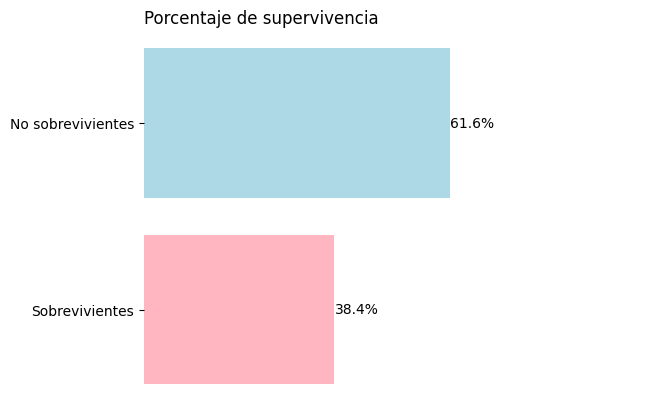

In [40]:
sobrevivieron = df[df['Survived'] == 1]['PassengerId'].count()
no_sobrevivieron = df[df['Survived'] == 0]['PassengerId'].count()
pasajeros = [no_sobrevivieron, sobrevivieron]

# Calculo los porcentajes
total_pasajeros = sobrevivieron + no_sobrevivieron
porcentaje_sobrevivientes = (sobrevivieron / total_pasajeros) * 100
porcentaje_no_sobrevivientes = (no_sobrevivieron / total_pasajeros) * 100
porcentaje = [porcentaje_sobrevivientes, porcentaje_no_sobrevivientes]

etiquetas = ['Sobrevivientes', 'No sobrevivientes']
 
plt.barh(etiquetas, porcentaje, color=['#FFB6C1', '#ADD8E6'])
plt.title('Porcentaje de supervivencia', loc='left')
plt.box(False)
plt.xticks([])
plt.ylabel('')

# Ajusto el límite del eje x para que quepan ambos porcentajes
plt.xlim(0, 100)

# Agrego los porcentajes dentro de las barras
for i, v in enumerate([porcentaje_sobrevivientes, porcentaje_no_sobrevivientes]):
    plt.text(v, i, f'{v:.1f}%', va='center')

plt.show()